# **Gradient Boosting**

In [10]:
# Gradient boosting intution

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles

In [11]:
X, y = make_circles(
    n_samples=100,
    factor=0.5,
    noise=0.15,
    random_state=0
)

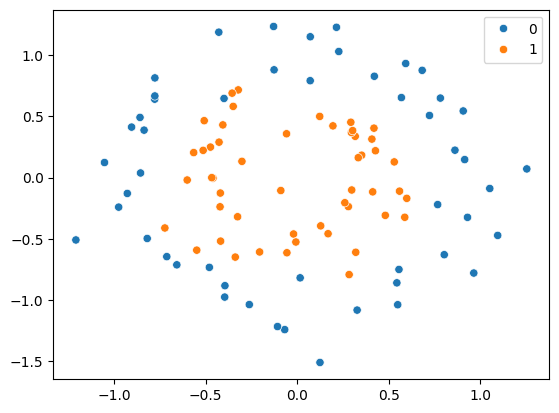

In [12]:
# visualizing the data

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [13]:
df = pd.DataFrame({
    "Col_1":X[:, 0],
    "Col_2":X[:, 1],
    "y": y
})

In [14]:
df.head()

,Col_1,Col_2,y
0,-0.928306,-0.129529,0
1,0.127708,-0.394127,1
2,0.913933,0.146873,0
3,0.351464,0.182781,1
4,-0.601253,-0.019918,1


In [15]:
df['y'].value_counts()

y
0    50
1    50
Name: count, dtype: int64

In [17]:
# initial prediction

df['Pre1(log_odds)'] = np.log(1)
df.head()

,Col_1,Col_2,y,Pre1(log_odds)
0,-0.928306,-0.129529,0,0.0
1,0.127708,-0.394127,1,0.0
2,0.913933,0.146873,0,0.0
3,0.351464,0.182781,1,0.0
4,-0.601253,-0.019918,1,0.0


In [18]:
# converting log odds to probability

df['pre1(probability)'] = 1/(1+np.exp(-np.log(1)))
df.head()

,Col_1,Col_2,y,Pre1(log_odds),pre1(probability)
0,-0.928306,-0.129529,0,0.0,0.5
1,0.127708,-0.394127,1,0.0,0.5
2,0.913933,0.146873,0,0.0,0.5
3,0.351464,0.182781,1,0.0,0.5
4,-0.601253,-0.019918,1,0.0,0.5


In [19]:
# calculating residual for stage 1
df['res1'] = df['y'] - df['pre1(probability)']
df.head()

,Col_1,Col_2,y,Pre1(log_odds),pre1(probability),res1
0,-0.928306,-0.129529,0,0.0,0.5,-0.5
1,0.127708,-0.394127,1,0.0,0.5,0.5
2,0.913933,0.146873,0,0.0,0.5,-0.5
3,0.351464,0.182781,1,0.0,0.5,0.5
4,-0.601253,-0.019918,1,0.0,0.5,0.5


In [20]:
# training the first decision tree

from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)
reg1.fit(df.iloc[:, 0:2].values, df.iloc[:, -1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

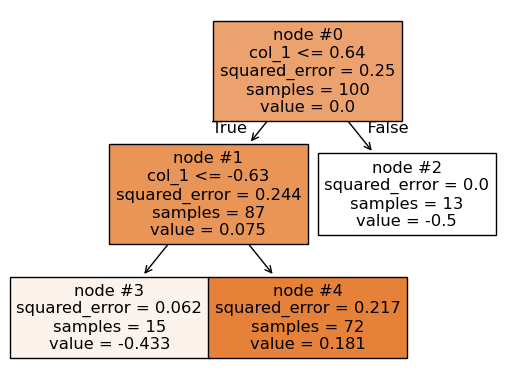

In [21]:
from sklearn.tree import plot_tree

plot_tree(reg1, feature_names=['col_1', 'col_2'], filled=True, node_ids=True)
plt.show()

In [22]:
df['leaf_entry'] = reg1.apply(df.iloc[:, 0:2])
df.head()

d:\srinivas\trainee-assignment-2025\training_venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,Col_1,Col_2,y,Pre1(log_odds),pre1(probability),res1,leaf_entry
0,-0.928306,-0.129529,0,0.0,0.5,-0.5,3
1,0.127708,-0.394127,1,0.0,0.5,0.5,4
2,0.913933,0.146873,0,0.0,0.5,-0.5,2
3,0.351464,0.182781,1,0.0,0.5,0.5,4
4,-0.601253,-0.019918,1,0.0,0.5,0.5,4


In [23]:
def return_logs(leaf):
    temp_df = df[df['leaf_entry'] == leaf]
    num = temp_df['res1'].sum()

    den = sum(temp_df['pre1(probability)'] * (1 - temp_df['pre1(probability)']))
    return round(num/den, 2)

In [24]:
df['pre2(log-odds)'] = df['Pre1(log_odds)'] + df['leaf_entry'].apply(return_logs)

In [25]:
df['pre2(probability)'] = 1/(1 + np.exp(-df['pre2(log-odds)']))
df.head()

,Col_1,Col_2,y,Pre1(log_odds),pre1(probability),res1,leaf_entry,pre2(log-odds),pre2(probability)
0,-0.928306,-0.129529,0,0.0,0.5,-0.5,3,-1.73,0.150588
1,0.127708,-0.394127,1,0.0,0.5,0.5,4,0.72,0.672607
2,0.913933,0.146873,0,0.0,0.5,-0.5,2,-2.00,0.119203
3,0.351464,0.182781,1,0.0,0.5,0.5,4,0.72,0.672607
4,-0.601253,-0.019918,1,0.0,0.5,0.5,4,0.72,0.672607


In [33]:
from sklearn.metrics import accuracy_score, f1_score


y_pred_int = np.where(df['pre2(probability)']>0.5, 1, 0)
y_true = df['y'].values

print(f"accuracy: {accuracy_score(y_true, y_pred_int):.4f}")
print(f"f1 score: {f1_score(y_true, y_pred_int):.4f}")

accuracy: 0.7600
f1 score: 0.8033


Repeating this process, gives you more accurated output

### **Using sklearn gradiant boosting library**

In [39]:
X, y = make_circles(
    n_samples=100,
    factor=0.5,
    noise=0.15,
    random_state=0
)

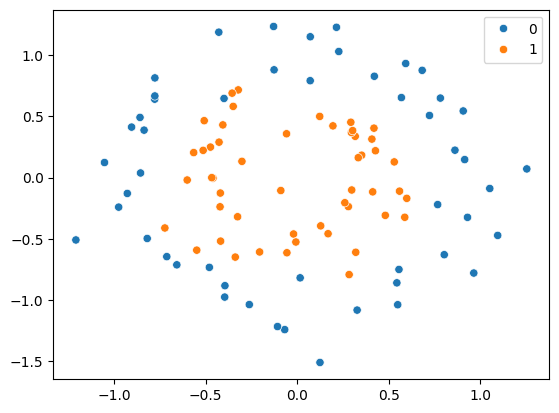

In [40]:
# visualizing the data

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [42]:
# using the gradient boosting classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV



x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

g_boost = GradientBoostingClassifier()
g_boost.fit(x_train, y_train)

GradientBoostingClassifier()

In [45]:
# getting scores on test data

y_pred = g_boost.predict(x_test)

print(f"accuracy_score: {accuracy_score(y_pred, y_test)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")

print(f"Train accuracy: {accuracy_score(y_train, g_boost.predict(x_train)):.3f}")
print(f"Train f1_score: {f1_score(y_train, g_boost.predict(x_train)):.3f}")

accuracy_score: 1.0
f1_score: 1.0
Train accuracy: 1.000
Train f1_score: 1.000


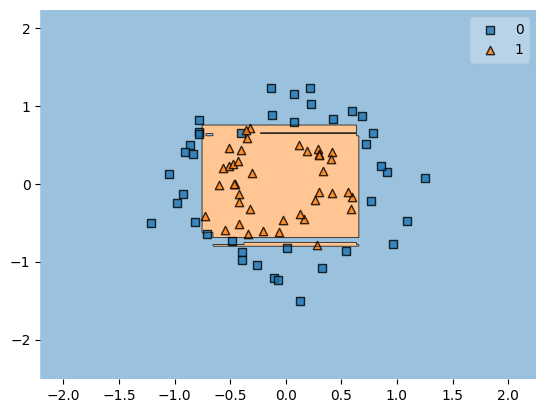

In [44]:
# observing the decision boundary
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, clf=g_boost)
plt.show()

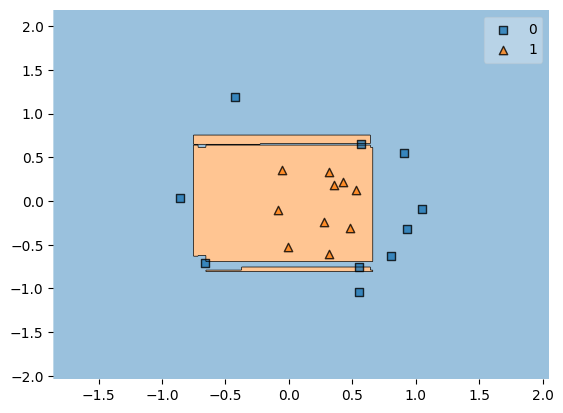

In [46]:
plot_decision_regions(x_test, y_test, clf=g_boost)
plt.show()